<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/Spatial_GNNDroughtPrediction200k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km.csv")

In [4]:
processed_dataset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
0,0,287,287,201505,15.271,-17.068,297.249,291.684,304.108,292.141,...,1557.17,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753
1,1,1125,287,201506,15.271,-17.068,298.479,292.966,307.924,293.551,...,1507.68,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415
2,2,1963,287,201507,15.271,-17.068,300.038,296.358,304.813,295.583,...,1814.58,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645
3,3,2801,287,201508,15.271,-17.068,300.277,297.167,304.959,297.178,...,3233.08,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260
4,4,3639,287,201509,15.271,-17.068,300.453,296.962,304.370,297.498,...,3829.11,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,83575,79997,387,202304,11.678,51.204,299.834,294.269,306.253,293.895,...,1735.93,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807
83576,83576,80835,387,202305,11.678,51.204,301.408,294.354,307.231,295.266,...,1694.04,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549
83577,83577,81673,387,202306,11.678,51.204,302.933,296.843,309.328,292.453,...,1555.81,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490
83578,83578,82511,387,202307,11.678,51.204,304.032,299.200,309.950,290.167,...,1414.49,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758


In [5]:
import networkx as nx
from geopy.distance import geodesic

In [131]:
sort_processed_dataset = processed_dataset.sort_values(by=["Month",'Lat','Lon'])
sort_processed_dataset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
36896,36896,832,832,201505,-33.238,18.865,288.610,280.177,303.344,282.436,...,3183.19,1579.13,284.951,0.000036,-0.646173,-1.422560,2015-05-01,2015,5,0.251283
40496,40496,833,833,201505,-33.238,20.661,286.602,277.234,299.677,276.598,...,2342.47,1065.27,283.865,0.000017,-0.060123,-0.716875,2015-05-01,2015,5,0.208038
44196,44196,834,834,201505,-33.238,22.458,287.657,277.419,300.492,277.622,...,2539.90,1144.62,284.058,0.000023,-0.395736,-0.197511,2015-05-01,2015,5,0.236802
47996,47996,835,835,201505,-33.238,24.255,288.242,279.026,302.691,278.494,...,3223.51,1457.66,284.624,0.000024,-0.034155,1.049300,2015-05-01,2015,5,0.201857
51696,51696,836,836,201505,-33.238,26.051,288.644,279.236,303.139,281.658,...,5622.32,2827.40,287.150,0.000034,-0.772399,0.596915,2015-05-01,2015,5,0.235473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16798,16798,82962,0,202308,36.831,2.695,299.798,292.088,308.027,292.618,...,2353.40,1375.94,300.270,0.000044,-3.007470,-2.283540,2023-08-01,2023,8,0.100696
18598,18598,82963,1,202308,36.831,4.492,298.952,290.859,308.724,290.093,...,2415.50,1451.00,299.869,0.000031,-2.610690,-1.962180,2023-08-01,2023,8,0.165674
20498,20498,82964,2,202308,36.831,6.288,299.179,290.378,310.346,290.137,...,2602.52,1682.16,299.597,0.000027,-2.657440,-1.154330,2023-08-01,2023,8,0.158589
22398,22398,82965,3,202308,36.831,8.085,299.810,291.612,314.138,290.430,...,2247.70,1509.14,299.815,0.000023,-1.496310,-1.311100,2023-08-01,2023,8,0.162999


In [134]:
sort_processed_dataset["row_index"] = sort_processed_dataset["Unnamed: 0.2"]

In [135]:
sort_processed_dataset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am,row_index
36896,36896,832,832,201505,-33.238,18.865,288.610,280.177,303.344,282.436,...,1579.13,284.951,0.000036,-0.646173,-1.422560,2015-05-01,2015,5,0.251283,36896
40496,40496,833,833,201505,-33.238,20.661,286.602,277.234,299.677,276.598,...,1065.27,283.865,0.000017,-0.060123,-0.716875,2015-05-01,2015,5,0.208038,40496
44196,44196,834,834,201505,-33.238,22.458,287.657,277.419,300.492,277.622,...,1144.62,284.058,0.000023,-0.395736,-0.197511,2015-05-01,2015,5,0.236802,44196
47996,47996,835,835,201505,-33.238,24.255,288.242,279.026,302.691,278.494,...,1457.66,284.624,0.000024,-0.034155,1.049300,2015-05-01,2015,5,0.201857,47996
51696,51696,836,836,201505,-33.238,26.051,288.644,279.236,303.139,281.658,...,2827.40,287.150,0.000034,-0.772399,0.596915,2015-05-01,2015,5,0.235473,51696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16798,16798,82962,0,202308,36.831,2.695,299.798,292.088,308.027,292.618,...,1375.94,300.270,0.000044,-3.007470,-2.283540,2023-08-01,2023,8,0.100696,16798
18598,18598,82963,1,202308,36.831,4.492,298.952,290.859,308.724,290.093,...,1451.00,299.869,0.000031,-2.610690,-1.962180,2023-08-01,2023,8,0.165674,18598
20498,20498,82964,2,202308,36.831,6.288,299.179,290.378,310.346,290.137,...,1682.16,299.597,0.000027,-2.657440,-1.154330,2023-08-01,2023,8,0.158589,20498
22398,22398,82965,3,202308,36.831,8.085,299.810,291.612,314.138,290.430,...,1509.14,299.815,0.000023,-1.496310,-1.311100,2023-08-01,2023,8,0.162999,22398


In [83]:
#smaller dataset used for testing
three_month_dataset = sort_processed_dataset[sort_processed_dataset["Month"].isin([201505, 201506, 201507])]

In [84]:
three_month_dataset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
36896,36896,832,832,201505,-33.238,18.865,288.610,280.177,303.344,282.436,...,3183.19,1579.13,284.951,0.000036,-0.646173,-1.422560,2015-05-01,2015,5,0.251283
40496,40496,833,833,201505,-33.238,20.661,286.602,277.234,299.677,276.598,...,2342.47,1065.27,283.865,0.000017,-0.060123,-0.716875,2015-05-01,2015,5,0.208038
44196,44196,834,834,201505,-33.238,22.458,287.657,277.419,300.492,277.622,...,2539.90,1144.62,284.058,0.000023,-0.395736,-0.197511,2015-05-01,2015,5,0.236802
47996,47996,835,835,201505,-33.238,24.255,288.242,279.026,302.691,278.494,...,3223.51,1457.66,284.624,0.000024,-0.034155,1.049300,2015-05-01,2015,5,0.201857
51696,51696,836,836,201505,-33.238,26.051,288.644,279.236,303.139,281.658,...,5622.32,2827.40,287.150,0.000034,-0.772399,0.596915,2015-05-01,2015,5,0.235473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,16701,1676,0,201507,36.831,2.695,300.353,293.030,309.171,292.229,...,2513.70,1591.47,300.604,0.000001,-2.261410,-1.873510,2015-07-01,2015,7,0.121016
18501,18501,1677,1,201507,36.831,4.492,299.238,291.321,308.161,289.708,...,2451.00,1597.00,300.809,0.000003,-1.836050,-1.868080,2015-07-01,2015,7,0.178833
20401,20401,1678,2,201507,36.831,6.288,299.959,290.885,311.877,289.940,...,2583.16,1696.82,300.668,0.000004,-1.862700,-1.576210,2015-07-01,2015,7,0.175729
22301,22301,1679,3,201507,36.831,8.085,300.016,291.303,312.436,290.518,...,2344.65,1654.86,301.121,0.000007,-1.020560,-1.140980,2015-07-01,2015,7,0.187649


**Spatial-Temporal Graph**

In [158]:
Spatial_temporal_graph = nx.Graph()

In [91]:
#reserved for testing versions of the graph
Spatial_temporal_graph_test = nx.Graph()

In [159]:
# Add nodes with features
for index, row in sort_processed_dataset.iterrows():
    Spatial_temporal_graph.add_node(index, **row[["row_index","Month",'Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())

print("finished creating node features")

finished creating node features


In [105]:
#Version of the graph with color attributes by the month; CODE DOESN'T WORK
colors =[
    'aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure',
    'beige', 'bisque', 'black', 'blanchedalmond', 'blue',
    'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse',
    'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson',
    'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray',
    'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen',
    'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen',
    'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet',
    'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue',
    'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro',
    'ghostwhite', 'gold', 'goldenrod', 'gray', 'green',
    'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred',
    'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush',
    'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan',
    'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink',
    'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey',
    'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen',
    'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid',
    'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise',
    'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin'
]

# Assuming 'sort_processed_dataset' has a 'Month' column
unique_months = sort_processed_dataset['Month'].unique()
month_color_map = {}

for i, month in enumerate(unique_months):
    month_color_map[month] = colors[i % len(colors)]

for index, row in sort_processed_dataset.iterrows():
    node_color = month_color_map[row['Month']]
    Spatial_temporal_graph.add_node(index, color=node_color, **row[["row_index","Month",'Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())

print("finished creating node features")

finished creating node features


In [16]:
unique_list_of_months = list(set(sort_processed_dataset["Month"]))
unique_list_of_months.sort()
unique_list_of_months

[201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106,
 202107,
 202108,
 202109,
 202110,
 202111,
 202112,
 202201,
 202202,
 202203,
 202204,
 202205,
 202206,
 202207,
 202208,
 202209,
 202210,
 202211,
 202212,
 202301,
 202302,
 202303,
 202304,
 202305,
 202306,
 202307,
 202308]

**Distance Spatial Graph**

In [11]:
import numpy as np
import math

def EuclideanDistance(x1, x2, y1, y2):
  return math.pow((math.pow((x1-x2),2)+math.pow((y1-y2),2)), 1/2)

In [12]:
total_index=0

for month in unique_list_of_months:
  dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == month]

  for i, row_i in dataset_subset.iterrows():
    for j, row_j in dataset_subset.iterrows():
      if EuclideanDistance(row_i["Lat"], row_i["Lon"], row_j["Lat"], row_j["Lon"]) <= 250:
        Spatial_temporal_graph.add_edge(j+total_index, i+total_index)

  total_index = len(dataset_subset) + total_index
  print("nodes processed: " + str(total_index))

KeyboardInterrupt: ignored

In [41]:
dataset_subset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
99,99,83249,287,202308,15.271,-17.068,300.694,297.191,304.767,297.173,...,3688.25,2774.800,303.145,1.863120e-05,0.590848,-0.177008,2023-08-01,2023,8,0.241853
199,199,83315,353,202308,11.678,-15.271,299.808,297.008,303.979,297.272,...,5548.48,4151.100,301.612,6.895430e-05,0.202160,-0.440952,2023-08-01,2023,8,0.494745
299,299,83282,320,202308,13.475,-15.271,300.340,296.425,306.293,297.179,...,6412.18,4567.170,302.735,4.085480e-05,0.017055,-0.413505,2023-08-01,2023,8,0.284643
399,399,83250,288,202308,15.271,-15.271,301.713,295.652,310.049,296.353,...,4785.86,3500.870,304.253,2.542490e-05,0.255993,-0.931372,2023-08-01,2023,8,0.143244
499,499,83217,255,202308,17.068,-15.271,302.763,294.968,312.539,295.420,...,2632.86,1872.920,305.665,1.350700e-05,-0.515056,-1.182390,2023-08-01,2023,8,0.093428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83179,83179,83421,459,202308,8.085,49.407,301.267,295.332,308.758,289.434,...,1489.86,1084.490,302.024,6.550340e-07,-1.878460,-1.617230,2023-08-01,2023,8,0.091263
83279,83279,83385,423,202308,9.881,49.407,300.419,294.015,306.637,286.041,...,1403.91,1038.670,302.655,5.138590e-07,1.622190,1.952580,2023-08-01,2023,8,0.099182
83379,83379,83348,386,202308,11.678,49.407,306.196,300.897,311.153,289.675,...,1650.33,1187.100,305.441,1.044440e-06,4.448400,4.509740,2023-08-01,2023,8,0.146285
83479,83479,83386,424,202308,9.881,51.204,300.222,296.370,305.795,291.744,...,1162.77,898.003,302.263,7.311530e-08,0.581537,0.897131,2023-08-01,2023,8,0.159424


**Grid Spatial Graph**

In [160]:
#Create Spatial Edges
for month in unique_list_of_months:
  dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == month]
  curLat = 0
  prevNode = 0

  #Add east-west edges
  dataset_subset = dataset_subset.sort_values(by=['Lat','Lon'])

  for i, row_i in dataset_subset.iterrows():
    if curLat == row_i["Lat"]:
      Spatial_temporal_graph.add_edge(prevNode, i)
      prevNode = i
    else:
      curLat = row_i["Lat"]
      prevNode = i

  #Add north-south edges
  dataset_subset = dataset_subset.sort_values(by=['Lon','Lat'])
  prevNode = 0
  curLon = 0

  for i, row_i in dataset_subset.iterrows():
    if curLon == row_i["Lon"]:
      Spatial_temporal_graph.add_edge(prevNode, i)
      #print(i)
      #print("edge created: "+str(prevNode)+" "+str(i))
      prevNode = i
    else:
      curLon = row_i["Lon"]
      prevNode = i

In [140]:
len(Spatial_temporal_graph)

84399

In [68]:
len(node_colors)

83580

In [107]:
#evalute the distribution of node colors for error analysis
from collections import Counter

frequency_distribution = Counter(node_colors)

distribution_dict = dict(frequency_distribution)

print(frequency_distribution)
print(distribution_dict)

Counter({'aliceblue': 836, 'antiquewhite': 836, 'aqua': 836, 'aquamarine': 836, 'azure': 836, 'beige': 836, 'bisque': 836, 'black': 836, 'blanchedalmond': 836, 'blue': 836, 'blueviolet': 836, 'brown': 836, 'burlywood': 836, 'cadetblue': 836, 'chartreuse': 836, 'chocolate': 836, 'coral': 836, 'cornflowerblue': 836, 'cornsilk': 836, 'crimson': 836, 'cyan': 836, 'darkblue': 836, 'darkcyan': 836, 'darkgoldenrod': 836, 'darkgray': 836, 'darkgreen': 836, 'darkgrey': 836, 'darkkhaki': 836, 'darkmagenta': 836, 'darkolivegreen': 836, 'darkorange': 836, 'darkorchid': 836, 'darkred': 836, 'darksalmon': 836, 'darkseagreen': 836, 'darkslateblue': 836, 'darkslategray': 836, 'darkslategrey': 836, 'darkturquoise': 836, 'darkviolet': 836, 'deeppink': 836, 'deepskyblue': 836, 'dimgray': 836, 'dimgrey': 836, 'dodgerblue': 836, 'firebrick': 836, 'floralwhite': 836, 'forestgreen': 836, 'fuchsia': 836, 'gainsboro': 836, 'ghostwhite': 836, 'gold': 836, 'goldenrod': 836, 'gray': 836, 'green': 836, 'greenyello

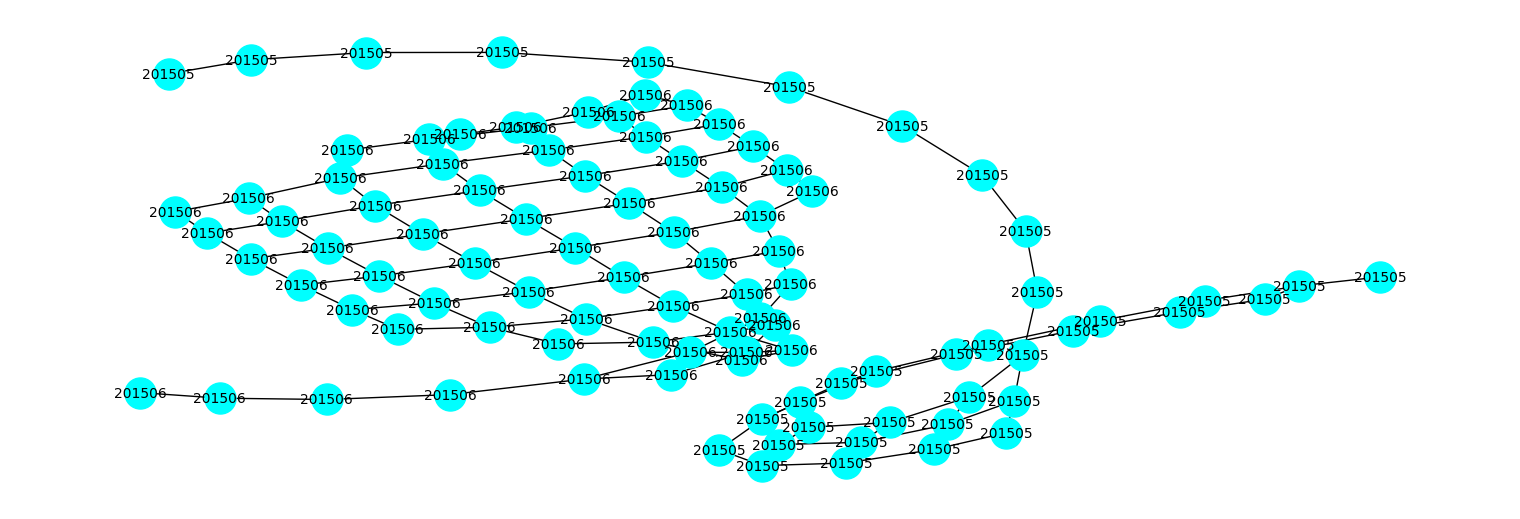

In [146]:
display_a_to_b_nodes(Spatial_temporal_graph, 800, 900, "Month")

Create 2 month temporal edges

In [161]:
total_index = 0

for i, month in enumerate(unique_list_of_months[:-1]):
    # Get the dataset for the current month and the next month
    dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == month]
    dataset_subset_2 = sort_processed_dataset[sort_processed_dataset["Month"] == unique_list_of_months[i+1]]

    # Create dictionaries for the coordinates
    coords_dict_1 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_1.iterrows()}
    coords_dict_2 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_2.iterrows()}

    # Iterate through the first dictionary and check if the coordinates exist in the second dictionary
    for coord, idx1 in coords_dict_1.items():
        idx2 = coords_dict_2.get(coord)
        if idx2 is not None:
            Spatial_temporal_graph.add_edge(idx1, idx2)

    # Update and print the processed count
    total_index += len(dataset_subset_1)
    print("nodes processed: " + str(total_index))

nodes processed: 836
nodes processed: 1672
nodes processed: 2508
nodes processed: 3344
nodes processed: 4180
nodes processed: 5016
nodes processed: 5852
nodes processed: 6688
nodes processed: 7524
nodes processed: 8360
nodes processed: 9196
nodes processed: 10032
nodes processed: 10868
nodes processed: 11704
nodes processed: 12540
nodes processed: 13376
nodes processed: 14212
nodes processed: 15048
nodes processed: 15884
nodes processed: 16720
nodes processed: 17556
nodes processed: 18392
nodes processed: 19228
nodes processed: 20064
nodes processed: 20900
nodes processed: 21736
nodes processed: 22572
nodes processed: 23408
nodes processed: 24244
nodes processed: 25080
nodes processed: 25916
nodes processed: 26752
nodes processed: 27588
nodes processed: 28424
nodes processed: 29260
nodes processed: 30096
nodes processed: 30932
nodes processed: 31768
nodes processed: 32604
nodes processed: 33440
nodes processed: 34276
nodes processed: 35112
nodes processed: 35948
nodes processed: 36784


In [162]:
list(Spatial_temporal_graph.edges())[0:900]

[(36896, 40496),
 (36896, 36996),
 (36896, 36897),
 (40496, 44196),
 (40496, 40596),
 (40496, 40497),
 (44196, 47996),
 (44196, 44296),
 (44196, 44197),
 (47996, 51696),
 (47996, 48096),
 (47996, 47997),
 (51696, 55396),
 (51696, 51796),
 (51696, 51697),
 (55396, 55496),
 (55396, 55397),
 (36996, 40596),
 (36996, 37096),
 (36996, 36997),
 (40596, 44296),
 (40596, 40696),
 (40596, 40597),
 (44296, 48096),
 (44296, 44396),
 (44296, 44297),
 (48096, 51796),
 (48096, 48196),
 (48096, 48097),
 (51796, 55496),
 (51796, 51896),
 (51796, 51797),
 (55496, 59096),
 (55496, 55596),
 (55496, 55497),
 (59096, 59196),
 (59096, 59097),
 (33396, 37096),
 (33396, 33496),
 (33396, 33397),
 (37096, 40696),
 (37096, 37196),
 (37096, 37097),
 (40696, 44396),
 (40696, 40796),
 (40696, 40697),
 (44396, 48196),
 (44396, 44496),
 (44396, 44397),
 (48196, 51896),
 (48196, 48296),
 (48196, 48197),
 (51896, 55596),
 (51896, 51996),
 (51896, 51897),
 (55596, 59196),
 (55596, 55696),
 (55596, 55597),
 (59196, 62696

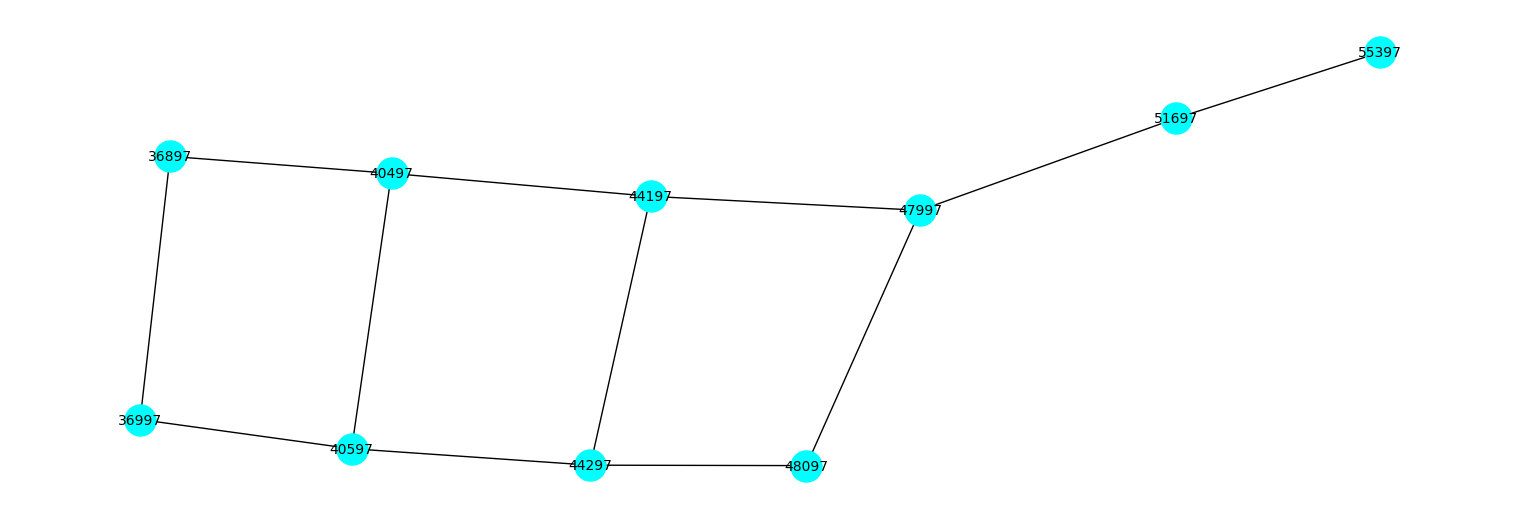

In [165]:
display_a_to_b_nodes(Spatial_temporal_graph, 836, 846, "row_index")

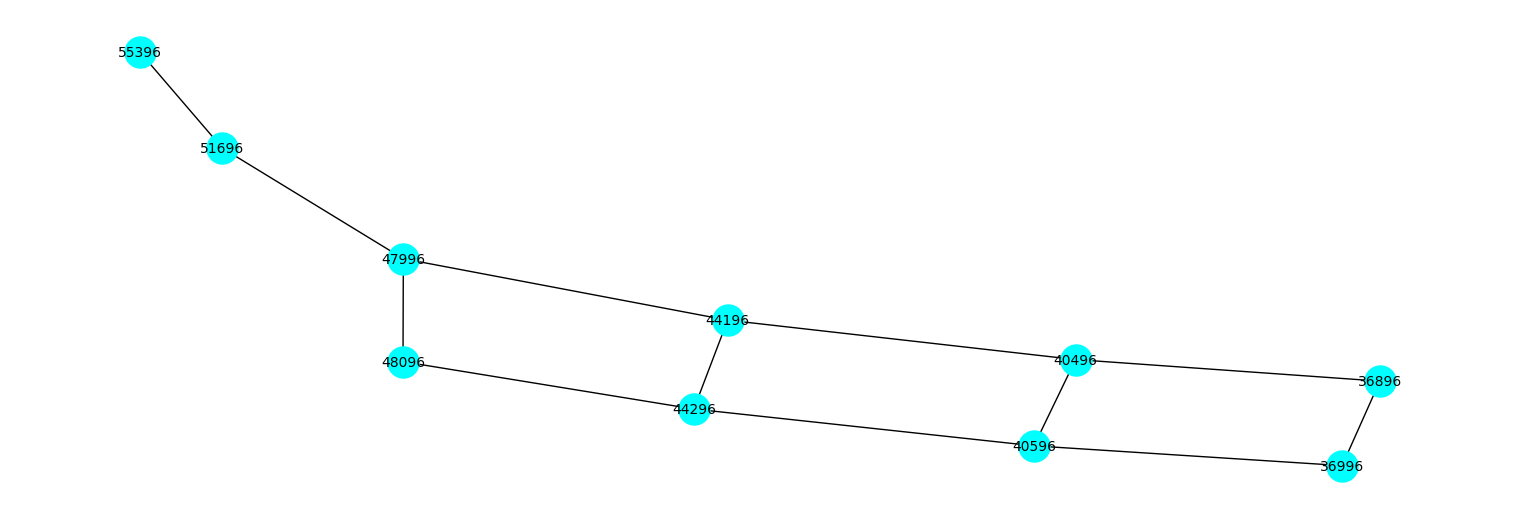

In [166]:
display_a_to_b_nodes(Spatial_temporal_graph, 0, 10, "row_index")

In [ ]:
#Create Temporal Edges
total_index=0

for i, month in enumerate(unique_list_of_months[:-1]):
  dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == month]
  dataset_subset_2 = sort_processed_dataset[sort_processed_dataset["Month"] == unique_list_of_months[i+1]]

  for i, row_i in dataset_subset_1.iterrows():
      for j, row_j in dataset_subset_2.iterrows():
        if row_j["Lon"] == row_i["Lon"] and row_j["Lat"] == row_i["Lat"]:
          Spatial_temporal_graph.add_edge(i, j)

  print("nodes processed: "+str(total_index))
  total_index = total_index+len(dataset_subset_1)

nodes processed: 0
nodes processed: 836


KeyboardInterrupt: ignored

**Graph Display**

In [78]:
def display_a_to_b_nodes(graph, a, b, attribute_name, node_colors):
    # Convert graph nodes to a list for indexing
    all_nodes = list(graph.nodes())

    # Extract nodes from index a to b
    nodes_subset = all_nodes[a:b]

    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)

    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}

    # Extract the corresponding subset of node_colors
    colors_subset = [node_colors[all_nodes.index(node)] for node in nodes_subset]

    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color=colors_subset, node_size=500, edge_color='black', linewidths=1, font_size=10, labels=node_labels)
    plt.show()

In [110]:
def display_a_to_b_nodes(graph, a, b, attribute_name):
    # Extract nodes from index a to b
    nodes_subset = list(graph.nodes())[a:b]

    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)

    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}

    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color="cyan", node_size=500, edge_color='black', linewidths=1, font_size=10, labels=node_labels)
    plt.show()

In [20]:
display_a_to_b_nodes(Temporal_graph, 90, 103)

NameError: ignored

In [ ]:
#Access node attibutes for the 80th node
Temporal_graph.nodes[list(Temporal_graph.nodes())[80]]

{'Lat': -17.068,
 'Lon': 15.271,
 'temperature_2m': 297.827,
 'temperature_2m_min': 291.844,
 'temperature_2m_max': 306.671,
 'dewpoint_temperature_2m': 285.132,
 'total_precipitation_sum': 0.000353725,
 'total_precipitation_min': 0.0,
 'total_precipitation_max': 0.00018689,
 'u_component_of_wind_10m': -1.58611,
 'v_component_of_wind_10m': -3.68987,
 'surface_net_solar_radiation_sum': 464593000.0,
 'total_evaporation_sum': -0.0178993,
 'soil_moisture_am': 0.138418,
 'soil_moisture_pm': 0.131772,
 'NDVI': 2218.14,
 'EVI': 1488.29,
 'next_month_tempreature': 301.28,
 'next_month_precipitation': 3.39397e-11,
 'year': 2022,
 'month2': 1,
 'spei01': -3.79605}

**Graph Neural Network**

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
os.environ['PYTHONWARNINGS'] = "ignore"
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.0 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-9_efswok
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-9_efswok
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 6f5fabe08a870dd06ef9326aba811f5807620325
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.4.0-py3-none-any.whl size=1070410 sha256=cc9a7340924a77a6ac04b1cc940bd4d5df628df63b03710dbdc1c10635b49d6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-dhd47kaw/wheels/